In [97]:
import numpy as np
import matplotlib.pyplot as plt

In [150]:
weight=[95,75,23,73,50,22,6,57,89,98]
value=[89,59,19,43,100,72,44,16,7,64]
l=len(value)
n=30                                    #粒子群个数
c1=2.0                                  #自学习因子
c2=2.0                                  #社会因子
vmax=4                                  #最大速度
vmin=-4                                 #最小速度
group=np.random.randint(0,2,(n,l))      #随机生成粒子
P=[[0]*l]*n                             #个体最优矩阵
V=[[1.0]*l]*n                             #速度矩阵     
P_best=[0]*l                            #全局最优矩阵
t=0                                     #t为当前的迭代次数
m=200                                   #最大迭代次数
volume=300
wmax=0.9
wmin=0.4
gb=[]                            #画图

def tweight(a,weight):
    fit_w=0
    for i in range(l):
        fit_w+=a[i]*weight[i]
    return fit_w

def overweight(group):                       #拿哪个物品
    random=np.random.randint(0,10)
    group[random]=0
    
def takeout(group):
    for i in range(n):                          #将超重的拿出来
        while tweight(group[i],weight)>volume:
            overweight(group[i]) 
    
def function(v):
    s=0
    s=1/(1+np.exp(-v))
    return s

def compare(s,x):
    pro=np.random.rand()
    if s>pro:
        x=1
    else:
        x=0
    return x
        
def v_update(v,w,c1,c2,p1,p2,x):
    v=w*v+c1*np.random.rand()*(p1-x)+c2*np.random.rand()*(p2-x)
    return v
    
def w_update(wmax,wmin,t):
    w=wmax-(wmax-wmin)/m*t
    return w
    
    
def funvalue(a,value):          #适应度函数
    fit_v=0
    for i in range(l):
        fit_v+=a[i]*value[i]
    return fit_v

def vlimit(vmax,vmin,v):
    if v>vmax:
        v=vmax
    if v<vmin:
        v=vmin
    return v

def printthing(maxfit,maxnum):
    thing=''
    print('物品的总价值为:',maxfit)
    for i in range(l):
        if maxnum[i]==1:
            thing+='第'
            thing+=str(i+1)
            thing+='件,'
    print('挑选的物品为:',thing)

In [153]:
takeout(group)
P=group[:]
g=[0]*l
gbest=0
for i in range(n):
    if gbest<funvalue(P[i],value):
        gbest=funvalue(P[i],value)
        g=P[i,:]
for i in range(m):
    t+=1
    w=w_update(wmax,wmin,t)
    for j in range(n):
        for k in range(l):
            V[j][k]=v_update(V[j][k],w,c1,c2,P[j][k],g[k],group[j][k])
            V[j][k]=vlimit(vmax,vmin,V[j][k])
            s=function(V[j][k])
            group[j][k]=compare(s,group[j][k])
        takeout(group)
        if funvalue(group[j],value)>funvalue(P[j],value):
            P[j]=group[j]
        if gbest<funvalue(P[j],value):
            gbest=funvalue(P[j],value)
            g=P[j,:]
            printthing(gbest,g)  
    gb.append(gbest)
printthing(gbest,g)    

物品的总价值为: 336
挑选的物品为: 第1件,第2件,第5件,第6件,第8件,
物品的总价值为: 339
挑选的物品为: 第1件,第2件,第3件,第5件,第6件,
物品的总价值为: 383
挑选的物品为: 第1件,第2件,第3件,第5件,第6件,第7件,
物品的总价值为: 388
挑选的物品为: 第1件,第3件,第5件,第6件,第7件,第10件,
物品的总价值为: 388
挑选的物品为: 第1件,第2件,第4件,第7件,


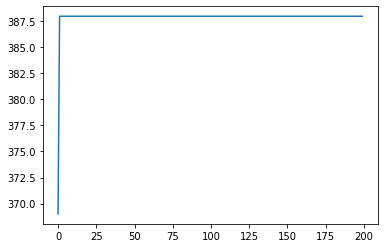

In [152]:
plt.plot(gb)
plt.show()